# Materiały dodatkowe
## Korelacja, grafy, regresja logistyczna, podstawy mierzenia jakości klasyfikatorów

### Korelacja

Dla dwóch zmiennych losowych $X_1,X_2$, korelacja mówi nam o tym, jak wiedza o wartościach $X_1$ wpływa na moją wiedzę o wartościach $X_2$ (i symetrycznie). (można rozumieć, że zmienne losowe to tutaj w założeniu "automaty" do losowania wartości liczbowych, losujemy je jak je obserwujemy. To jak często daną wartość przyjmie $X_1$ określa jej rozkład prawdopodobieństwa).

Jeśli $ cor(X_1, X_2 ) > 0 $ (zmienne są **dodatnio skorelowane**), to jeśli wiem, że $X_1$ jest duża, to $X_2$ prawdopodobnie też będzie duża.

Jeśli $ cor(X_1, X_2 ) <0 ) $, to gdy $X_1$ jest duże, to $X_2$ raczej będzie małe.

Jeśli mamy $ cor( X_1, X_2 )=0 $ to nic nie wiemy z powyższych. Nie oznacza to, że $X_1,X_2$ są niezależne statystycznie, jest to bardziej szczegółowy warunek, ale odwrotna zależność już jest (niezależność implikuje brak korelacji).

Generalnie, współczynnik korelacji przyjmuje wartości od -1 do 1.

**W praktyce:** w danych mamy obserwacje (można powiedzieć wyniki losowania). Korelacje liczymy na podstawie statystyk (funkcji w **R** :) ).

### Korelacja Pearsona i Spearmana

Podstawową korelację określa współczynnik korelacji Pearsona i ma ona prostą interpretację graficzną. Dane z niezerową korelacją powinny leżeć na prostej w przestrzeni 2D.

Korelacja Spearmana to korelacja Pearsona liczona na rangach, co z kolei powoduje, że określa ona siłę zależności **dowolnej relacji monotonicznej między** $X_1, X_2 $.

In [1]:
X_1= rnorm(1000)
X_2= 3*X_1 + rnorm(1000,0,0.25)
X_3=-X_2
X_4= X_2^3 + X_1^5
X_5=-X_4
X_matrix= cbind(X_1,X_2,X_3,X_4,X_5)

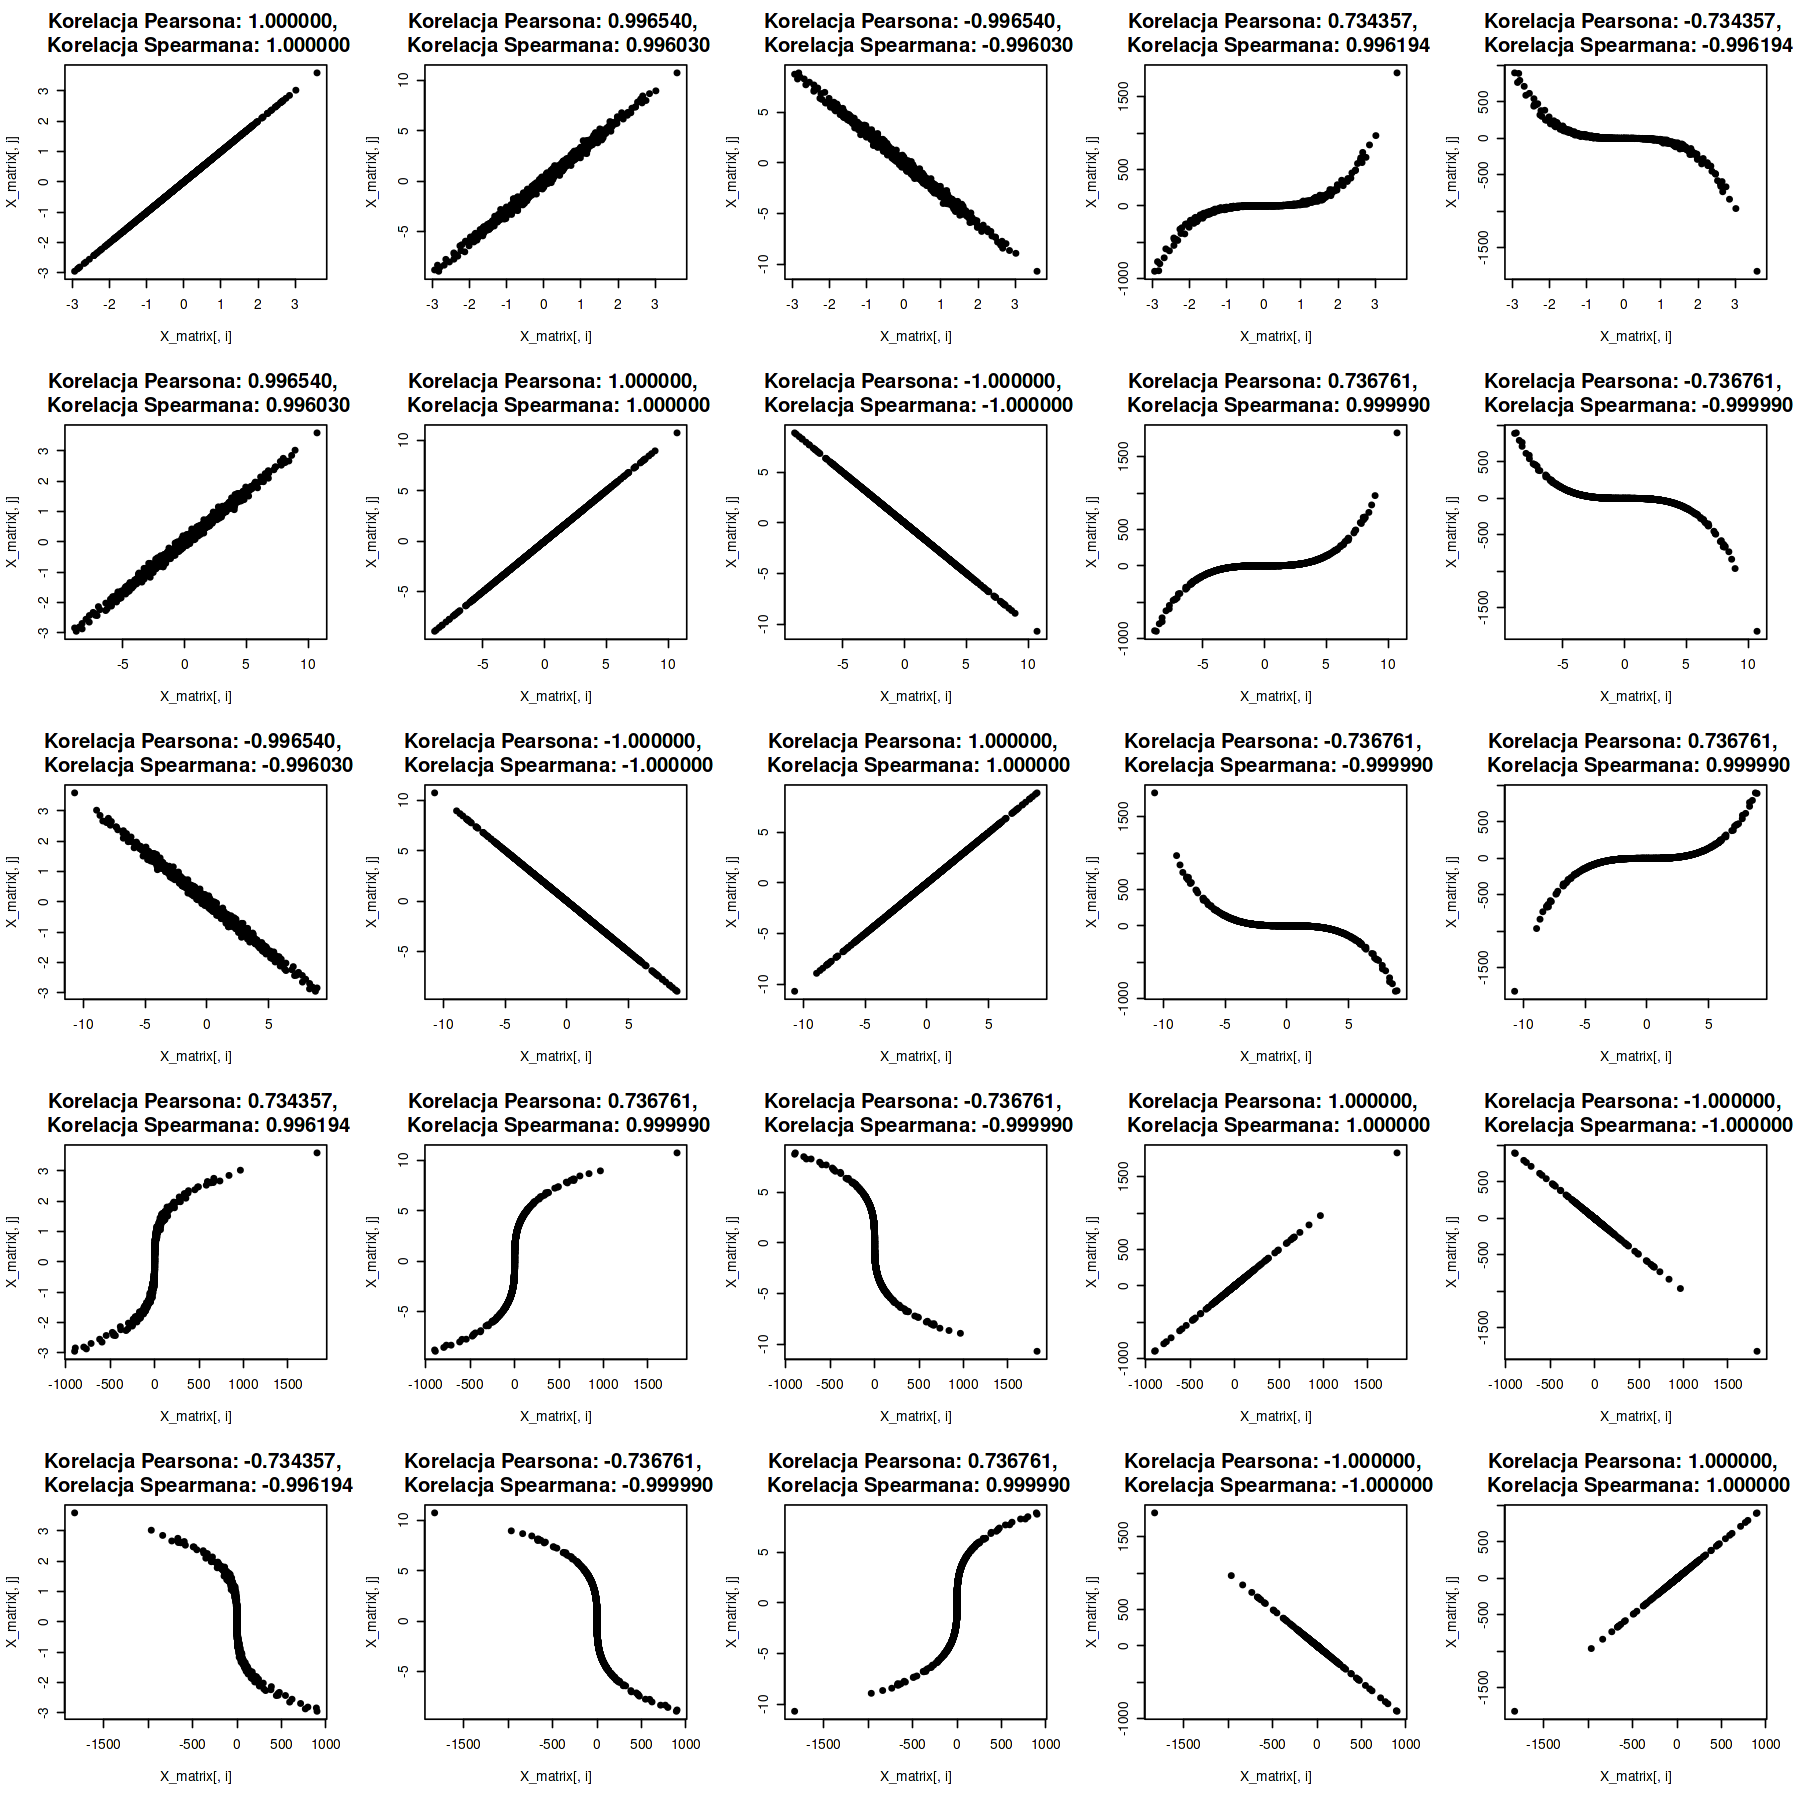

In [2]:
options(repr.plot.width=15, repr.plot.height=15)
par(mfrow=c(5,5))
for (i in 1:5)
for (j in 1:5)
    {
    plot(X_matrix[,i], X_matrix[,j], pch=16, cex.main=1.5,
         main=sprintf("Korelacja Pearsona: %f, \n Korelacja Spearmana: %f", cor(X_matrix[,i],
                                                                             X_matrix[,j]),
                                                                          cor(X_matrix[,i],
                                                                             X_matrix[,j],
                                                                             method="spearman")
                     )
        )
    }

### Macierz korelacji

To sposób opisu zbioru danych $X$ wymiaru $m \times n$ w postaci macierzy $ n \times n$ korelacji pomiędzy poszczególnymi $n$ zmiennymi w zbiorze.

In [3]:
cor(X_1,X_2)  #korelacja 2 wektorów

[1] 0.9965403

In [4]:
cor(X_1, X_matrix) #korelacja wektora i macierzy

X_1,X_2,X_3,X_4,X_5
1,0.9965403,-0.9965403,0.7343567,-0.7343567


In [5]:
cor(X_matrix) #korelacja każdy-z-każdym pomiędzy wszystkimi zmiennymi

,X_1,X_2,X_3,X_4,X_5
X_1,1.0000000,0.9965403,-0.9965403,0.7343567,-0.7343567
X_2,0.9965403,1.0000000,-1.0000000,0.7367611,-0.7367611
X_3,-0.9965403,-1.0000000,1.0000000,-0.7367611,0.7367611
X_4,0.7343567,0.7367611,-0.7367611,1.0000000,-1.0000000
X_5,-0.7343567,-0.7367611,0.7367611,-1.0000000,1.0000000


In [6]:
cor(X_matrix, method='spearman') #korelacja Spearmana

,X_1,X_2,X_3,X_4,X_5
X_1,1.0000000,0.9960301,-0.9960301,0.9961940,-0.9961940
X_2,0.9960301,1.0000000,-1.0000000,0.9999904,-0.9999904
X_3,-0.9960301,-1.0000000,1.0000000,-0.9999904,0.9999904
X_4,0.9961940,0.9999904,-0.9999904,1.0000000,-1.0000000
X_5,-0.9961940,-0.9999904,0.9999904,-1.0000000,1.0000000


## Grafy

Graf to prosty obiekt złożony ze zbioru wierzchołków oraz krawędzi, które łączą co niektóre wierzchołki.

Prosty graf nieważony odwzorowuje **macierz sąsiedztwa** $A$:

In [7]:

#robimy przykładowy graf z macierzy zer i jedynek
#A[i,j]==1, gdy wierzchołek i oraz j są połączone, 0 inaczej
#A zatem jest symetryczna
A= (cor(X_matrix) > 0.6)*1
diag(A) <- 0 #zerujemy przekątną
A

,X_1,X_2,X_3,X_4,X_5
X_1,0,1,0,1,0
X_2,1,0,0,1,0
X_3,0,0,0,0,1
X_4,1,1,0,0,0
X_5,0,0,1,0,0


### igraph

Przydatna biblioteka do analizy grafów.

In [8]:
require(igraph)
G_x<- graph_from_adjacency_matrix(A,mode = "undirected") 

Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




Ten graf ma **2 połączone komponenty**:

- złożony z $X_3, X_5$,

- złożony z $X_1,_X2,X_4$

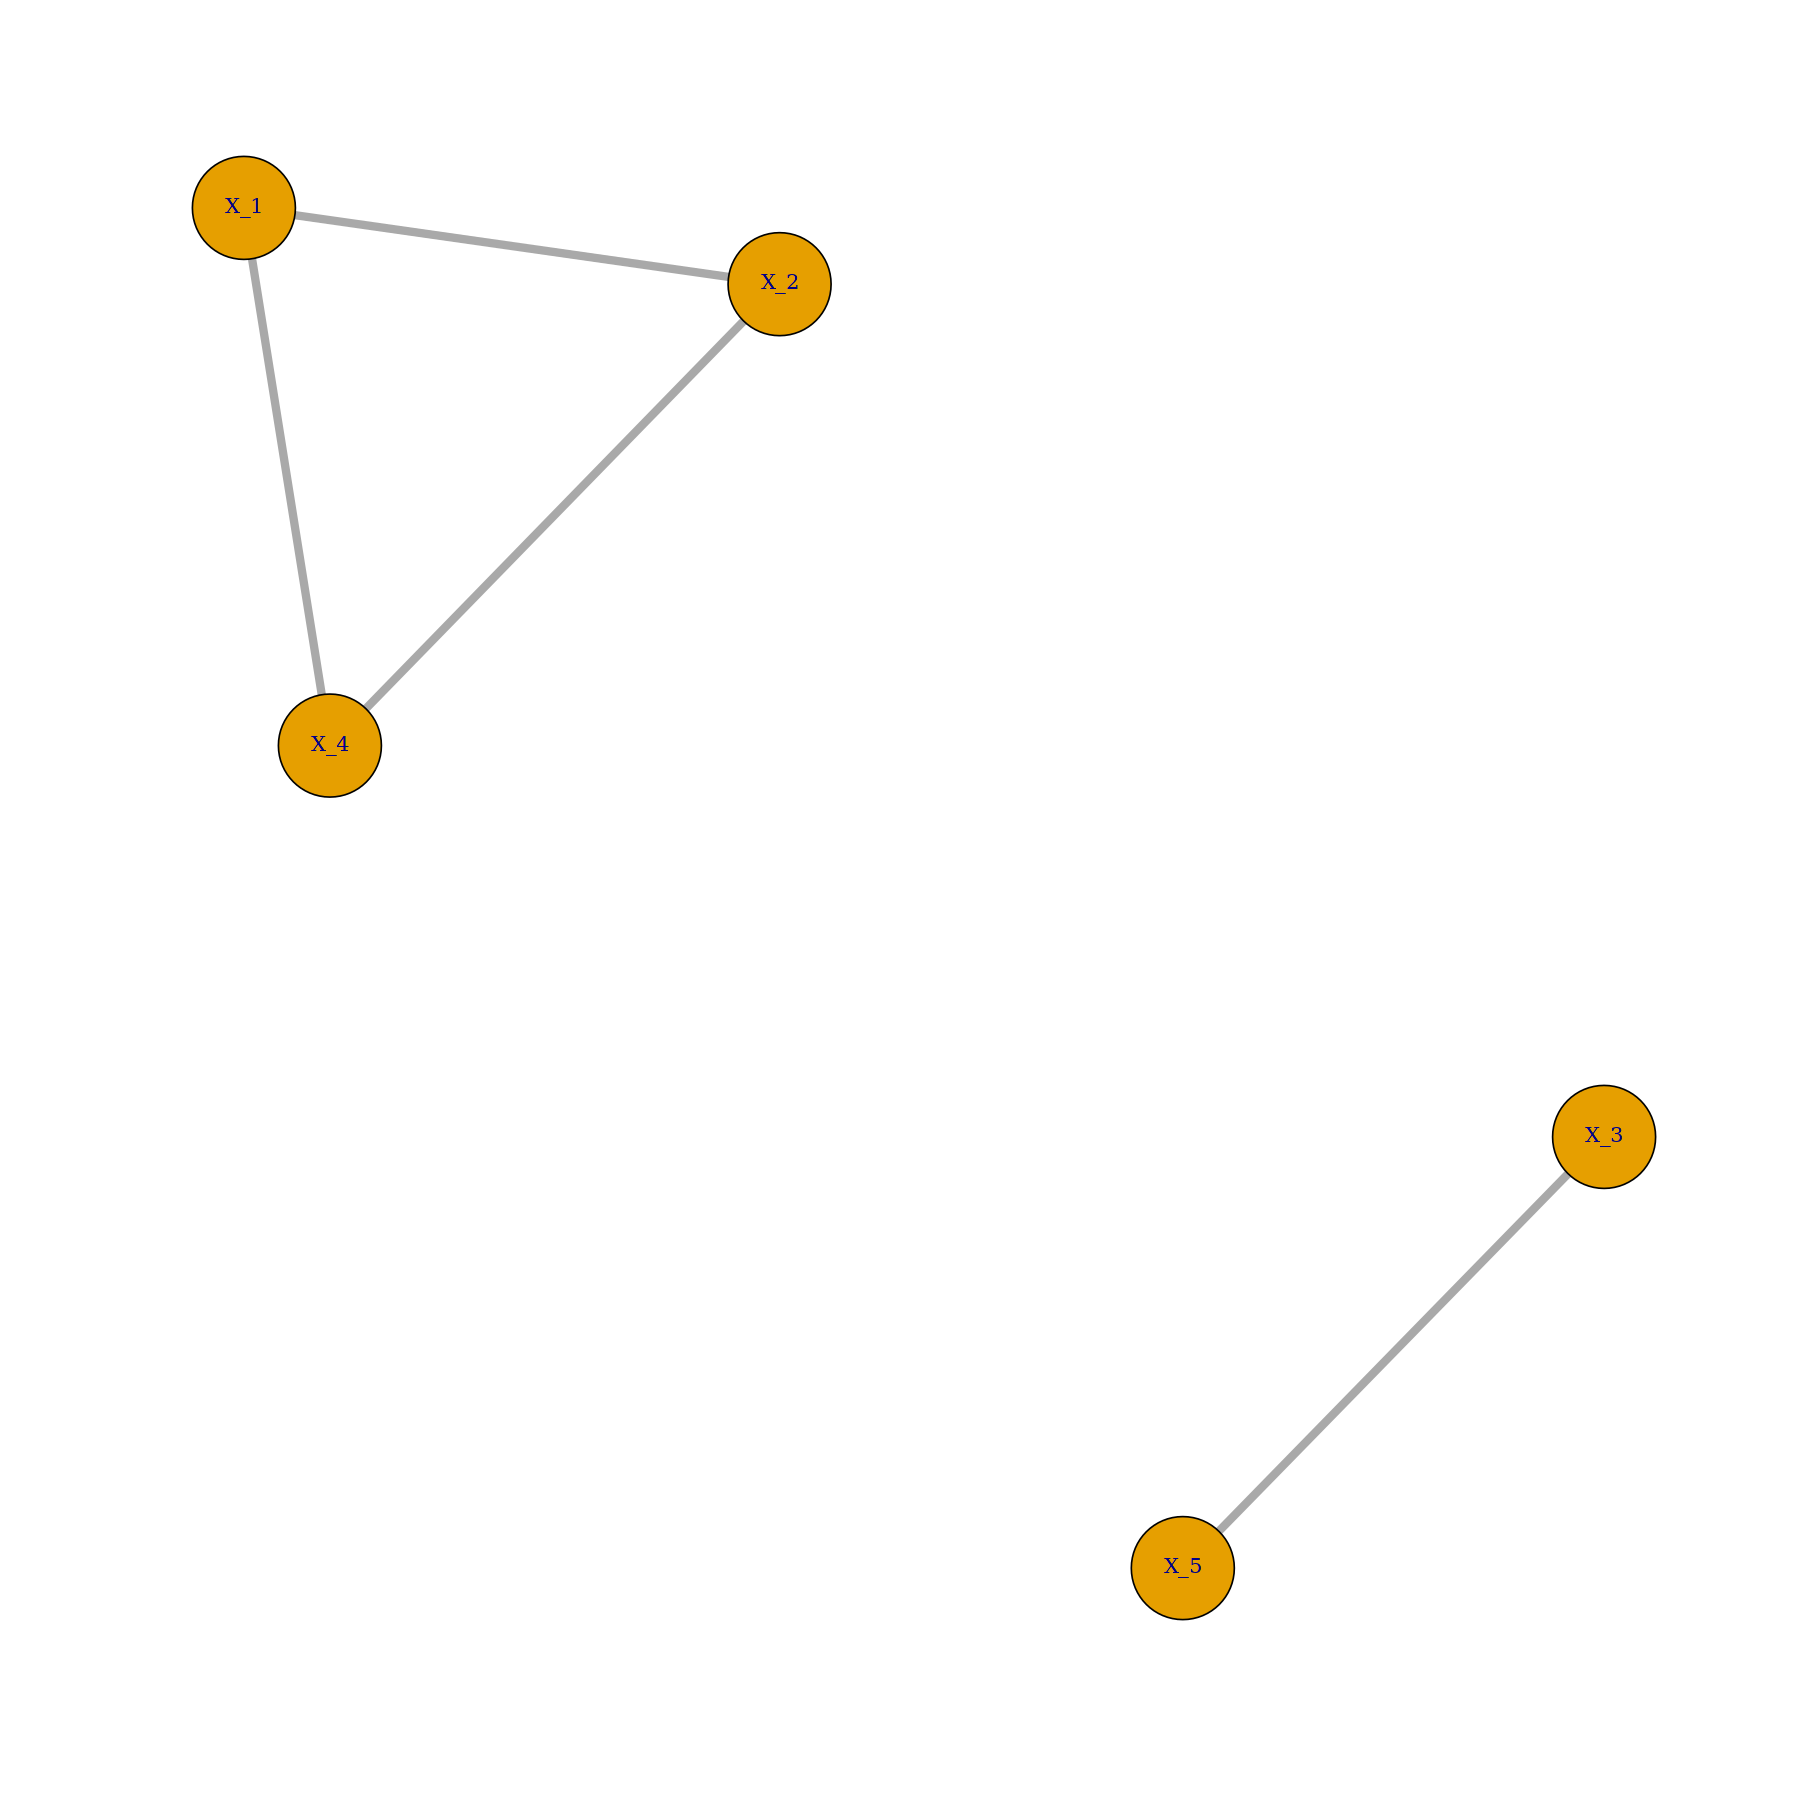

In [9]:
plot(G_x, edge.width=5)

In [10]:
components(G_x) #funkcja z igraph licząca komponenty grafu

#membership - wektor określający, do którego komponentu wierzchołek należy
#csize- rozmiar danego komponentu w liczbie wierzchołków
#no - liczba komponentów

$membership
X_1 X_2 X_3 X_4 X_5 
  1   1   2   1   2 

$csize
[1] 3 2

$no
[1] 2

### Stopień wierchołka i

To liczba połączeń, lub naczej $ \large \sum_j A_{ij} $

### Laplacjan grafu G

To macierz $ \large L = A - D $, gdzie $D$ to macierz diagonalna (0 wszędzie tylko nie na przekątnej) $ \large D_{ii}= \sum_j A_{ij} $.

Okazuje się, że **wymiarowość jądra/ przestrzeni zerowej (kernel/nullspace, algebra liniowa)** macierzy $ \large L $ jest równa liczbie połączonych komponentów grafu opisanego przez $ \large A $. Akurat tutaj wymiarowość oznacza, że mamy maksymlanie 2 niezależne liniowo wektory $v$ takie, że $ L v = 0$.

#### Przypomnienie po krótce - algebra

**Nullspace** macierzy $ \large L $ to przestrzeń takich wektorów $v$, że $\large L v = 0 $.

Inne pojęcie: **wartość własna** (eigenvalue) macierzy $ \large L $ to taka liczba $c$, że $ \large L v = c v $ dla jakiegoś wektora $ v $. Ten $ v $ dla tego danego $ c $ to wektor własny (eigenwektor).

### Zastosowanie Laplacjanu
Zatem $ \large L $ ma tyle eigenwartości zerowych, ile graf mu odpowiadający ma połączonych komponentów. Idąc dalej - załóżmy, że mamy 2 zerowe eigenwartości. Zastępując w analizie macierz $A$ wymiaru $ n \times n$ macierzą $V$ wymiaru $n \times 2$, gdzie kolumnami $V$ są 2 liniowo niezależne eigenwektory długości $n$ odpowiadające pierwszym 2 zerowym eigenwartościom, możemy odczytać połączone komponenty grafu $G$ ( $\large V_{ik} \neq 0 $ jeżeli wierzchołek $n$ należy do komponentu $k$).

#### Przykład:

Po pierwsze - gotowa funkcja, licząca nullspace, tak jak trzeba. Po korekcie drobnycho odstępstw numerycznych uzyskamy macierz $V$.

In [11]:
library(pracma)       
NullSpace <- function (A) {
  m <- dim(A)[1]; n <- dim(A)[2]
  ## QR factorization and rank detection
  QR <- base::qr.default(A)
  r <- QR$rank
  ## cases 2 to 4
  if ((r < min(m, n)) || (m < n)) {
    R <- QR$qr[1:r, , drop = FALSE]
    P <- QR$pivot
    F <- R[, (r + 1):n, drop = FALSE]
    I <- base::diag(1, n - r)
    B <- -1.0 * base::backsolve(R, F, r)
    Y <- base::rbind(B, I)
    X <- Y[base::order(P), , drop = FALSE]
    return(X)
    }
  ## case 1
  return(base::matrix(0, n, 1))
  }

In [12]:
A

,X_1,X_2,X_3,X_4,X_5
X_1,0,1,0,1,0
X_2,1,0,0,1,0
X_3,0,0,0,0,1
X_4,1,1,0,0,0
X_5,0,0,1,0,0


In [13]:
D= diag(colSums(A))
D

2,0,0,0,0
0,2,0,0,0
0,0,1,0,0
0,0,0,2,0
0,0,0,0,1


In [14]:
L= A - D
L

,X_1,X_2,X_3,X_4,X_5
X_1,-2,1,0,1,0
X_2,1,-2,0,1,0
X_3,0,0,-1,0,1
X_4,1,1,0,-2,0
X_5,0,0,1,0,-1


In [15]:
V<- NullSpace(L)
V

1,0
1,0
0,1
1,0
0,1


In [16]:
ComponentIndicatorMatrix<- ( V >=1e-5 )*1.  # to będzie konieczne na prawdziwych danych z powodu możliwych błędów numerycznych
ComponentIndicatorMatrix   # tego już można użyć do sprawdzania komponentu, do którego należy dany wierzchołek

1,0
1,0
0,1
1,0
0,1


In [17]:
#dobrze porównać wyniki przykładu z rysunkiem i macierzą A
A

,X_1,X_2,X_3,X_4,X_5
X_1,0,1,0,1,0
X_2,1,0,0,1,0
X_3,0,0,0,0,1
X_4,1,1,0,0,0
X_5,0,0,1,0,0


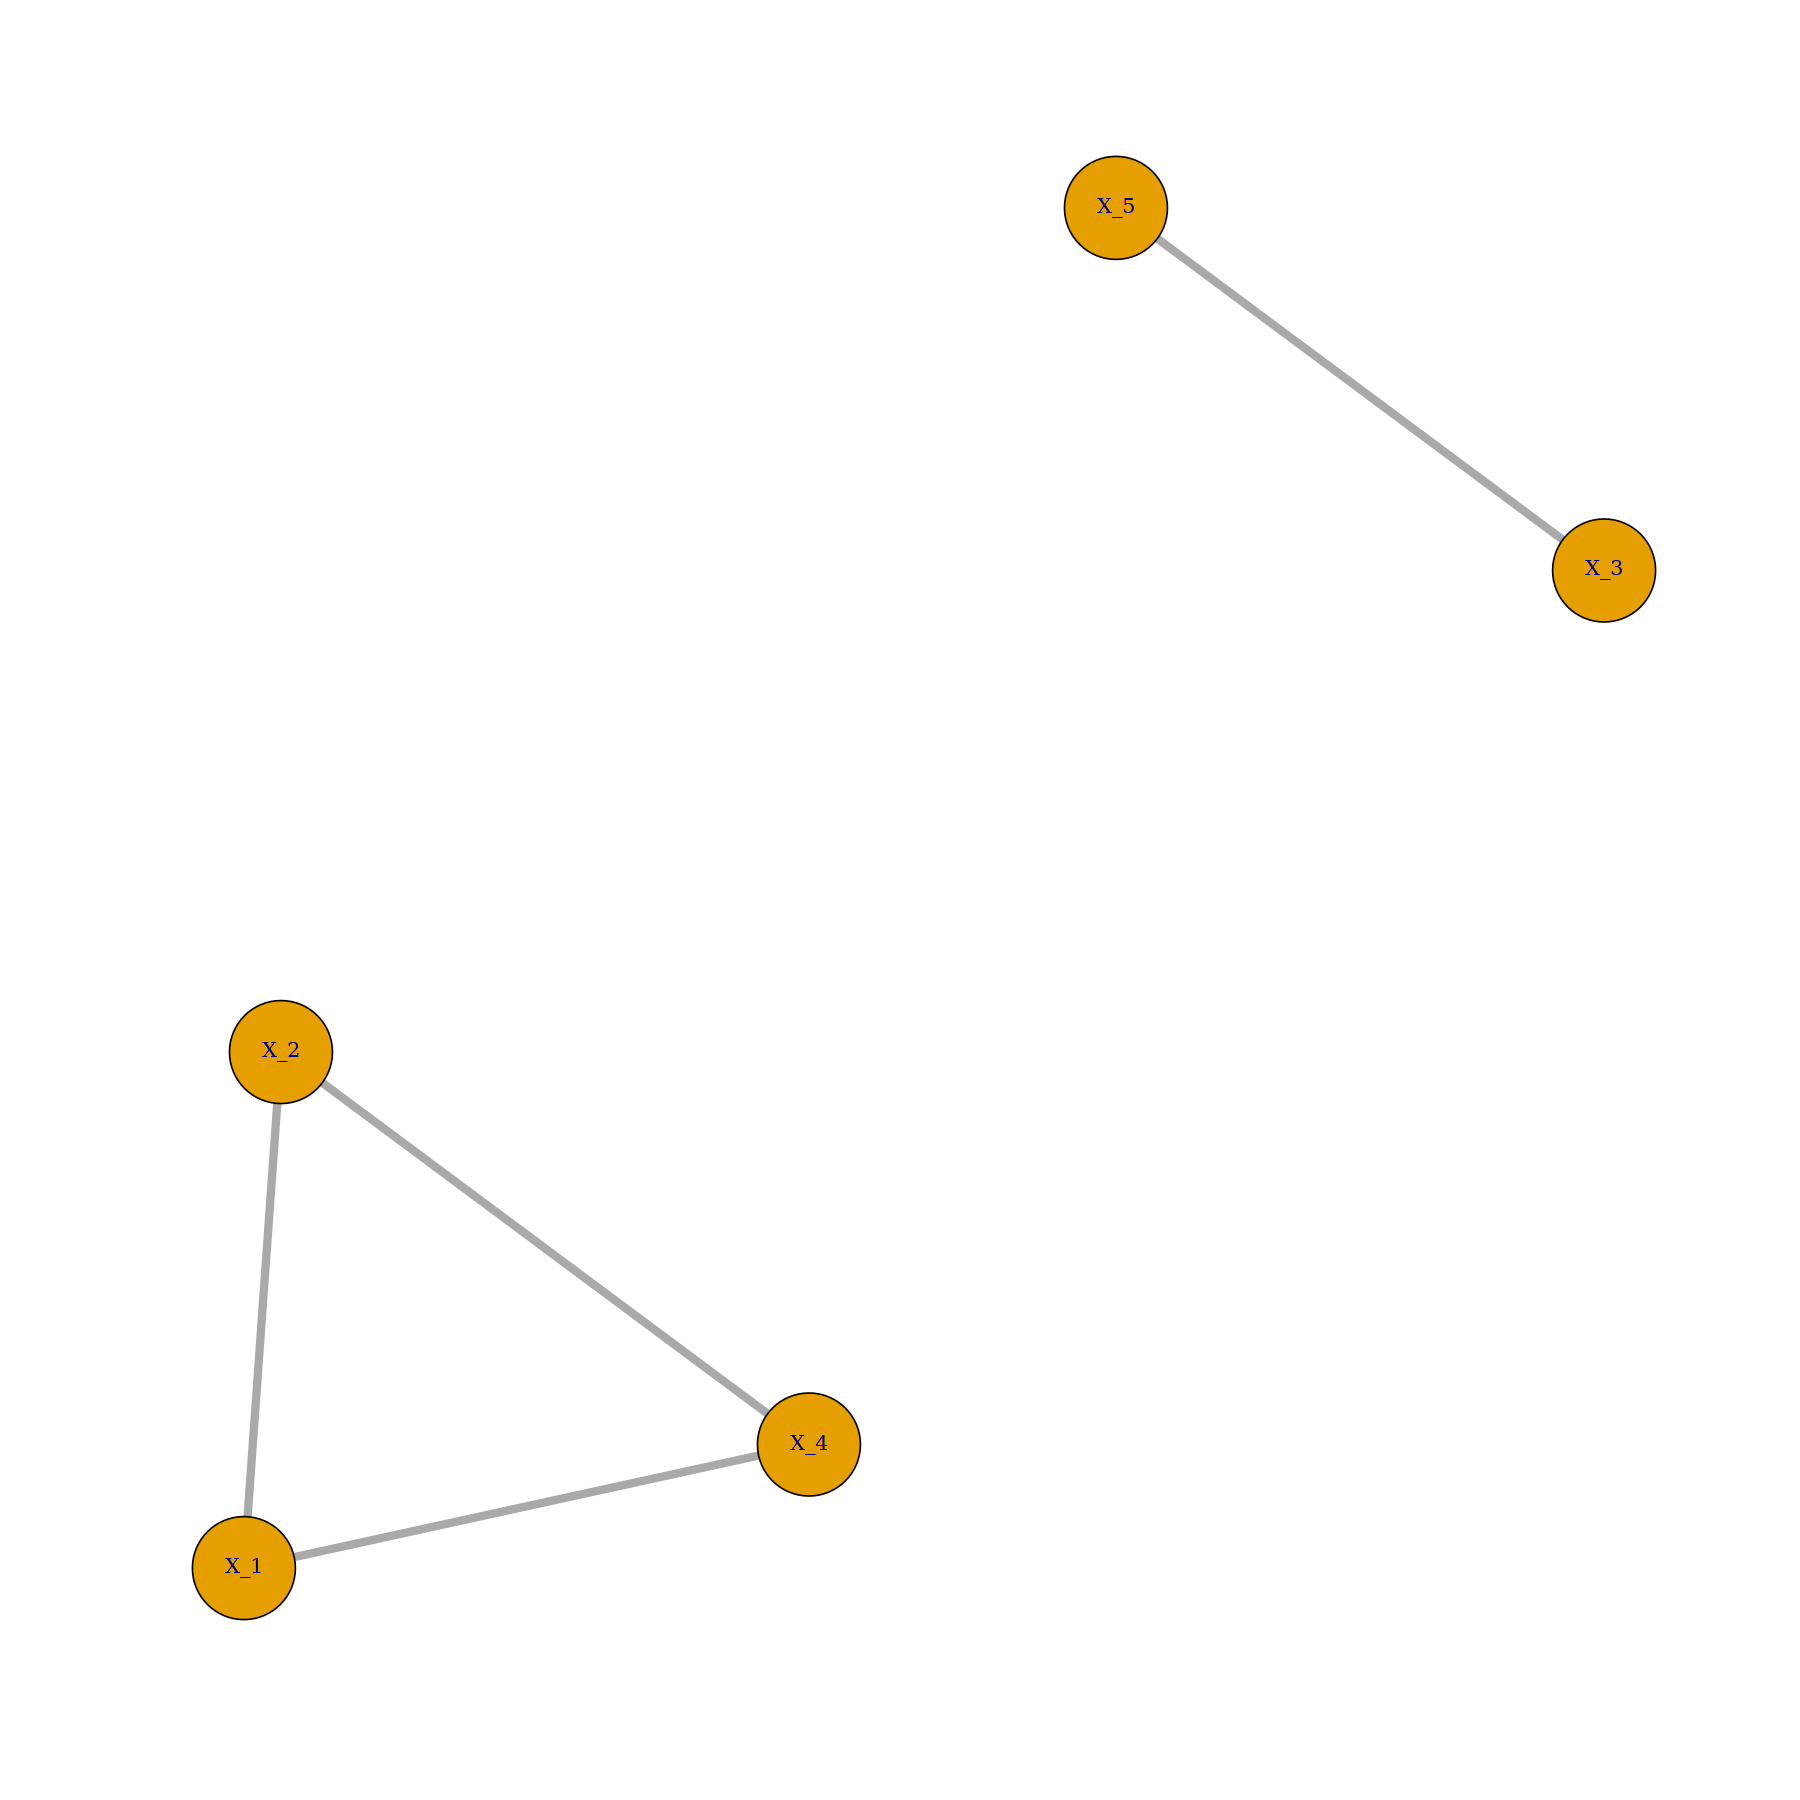

In [18]:
plot(G_x, edge.width=5)

## PCA i SVD

$PCA$ (analiza głównych składowych) to technika analityczna pozwalająca na redukcję wymiarowości zbioru danych. 

Na wejściu, mamy zbiór danych wymiaru $m \times n$, $n$ prawdopodobnie duże. Na wyjściu - dostajemy zbiór danych opisujący te same obserwacje, ale za pomocą zazwyczaj mniejszej liczby zmiennych $p$, zwanych głównymi składowymi.

Główne składowe znowu mają prostą interpretację algebraiczną. Jak mamy $N$ zmiennych i $M$ obserwacji, możemy to traktować jako zbiór $M$ wektorów w przestrzeni $ND$. W $PCA$, obracamy układ współrzędny tak, aby pierwsze osie nowego układu niosły jak najwięcej informacji o danych. Odpowiada to obliczeniu projekcji na eigenwektory macierzy kowariancji układu... W praktyce: stosujemy rozkład $SVD$ na macierzy z danymi $X$:

$X= U \Xi V $

$ m \times n = m \times n * n \times n * m \times m $

Wartości singularne (singular values) znajdują się w macierzy diagonalnej $\Xi$. Okazuje się, że pierwsze $k$ głównych składowych powstanie, jak przemnożymy pierwsze $k$ kolumn $U$ macierzowo przez wycinek $k \times k$ macierzy $ \Xi $:

$  \large PCs^{1 \dots k}_{1 \dots m} = U^{1 \dots k}_{1 \dots m} \Xi^{1 \dots k}_{1 \dots k} $.

Kod:

In [19]:
# konstrukcja bardziej obrazowego przykładu danych pod PCA
dataSize=length(X_matrix)
dataDim=dim(X_matrix)
Noise<-  rnorm(dataSize,0,1.5)
dim(Noise)<-dataDim
X_train<- X_matrix + Noise

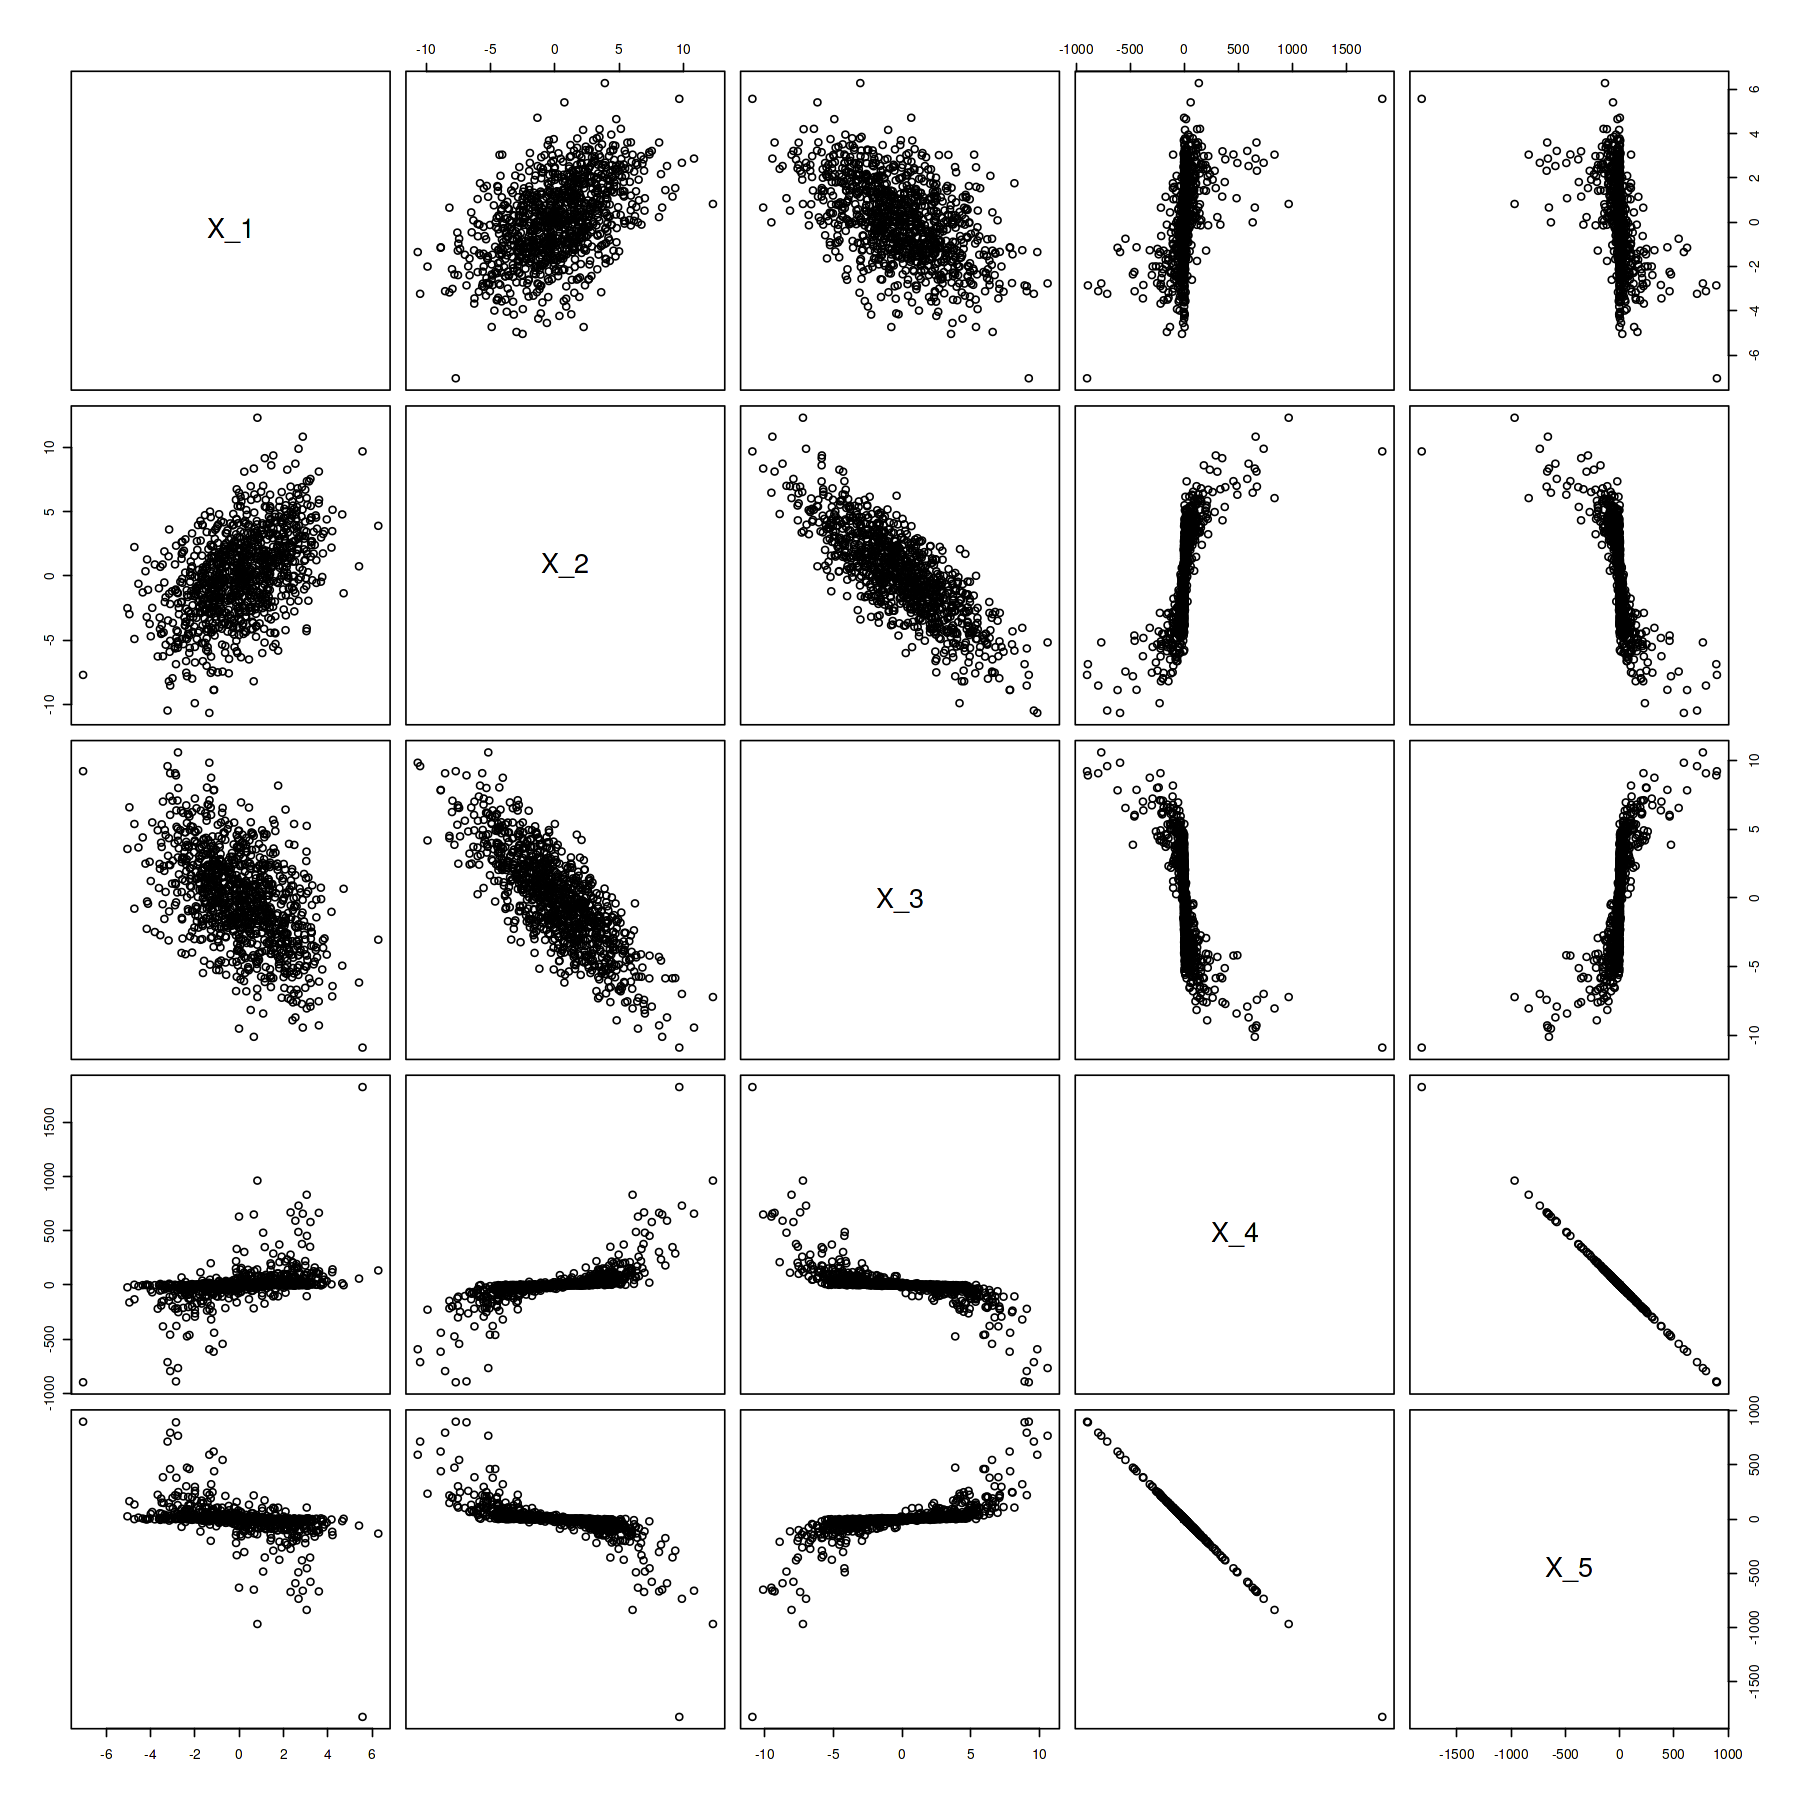

In [20]:
plot(as.data.frame(X_train))

In [21]:

X_SVD<-svd(X_train)

In [22]:
# wszystkie główne składowe to U %*% D

U<-X_SVD$u
D<- diag(X_SVD$d)
PCs= U %*% D


In [23]:
dim(X_train)
dim(PCs)


[1] 1000    5

[1] 1000    5

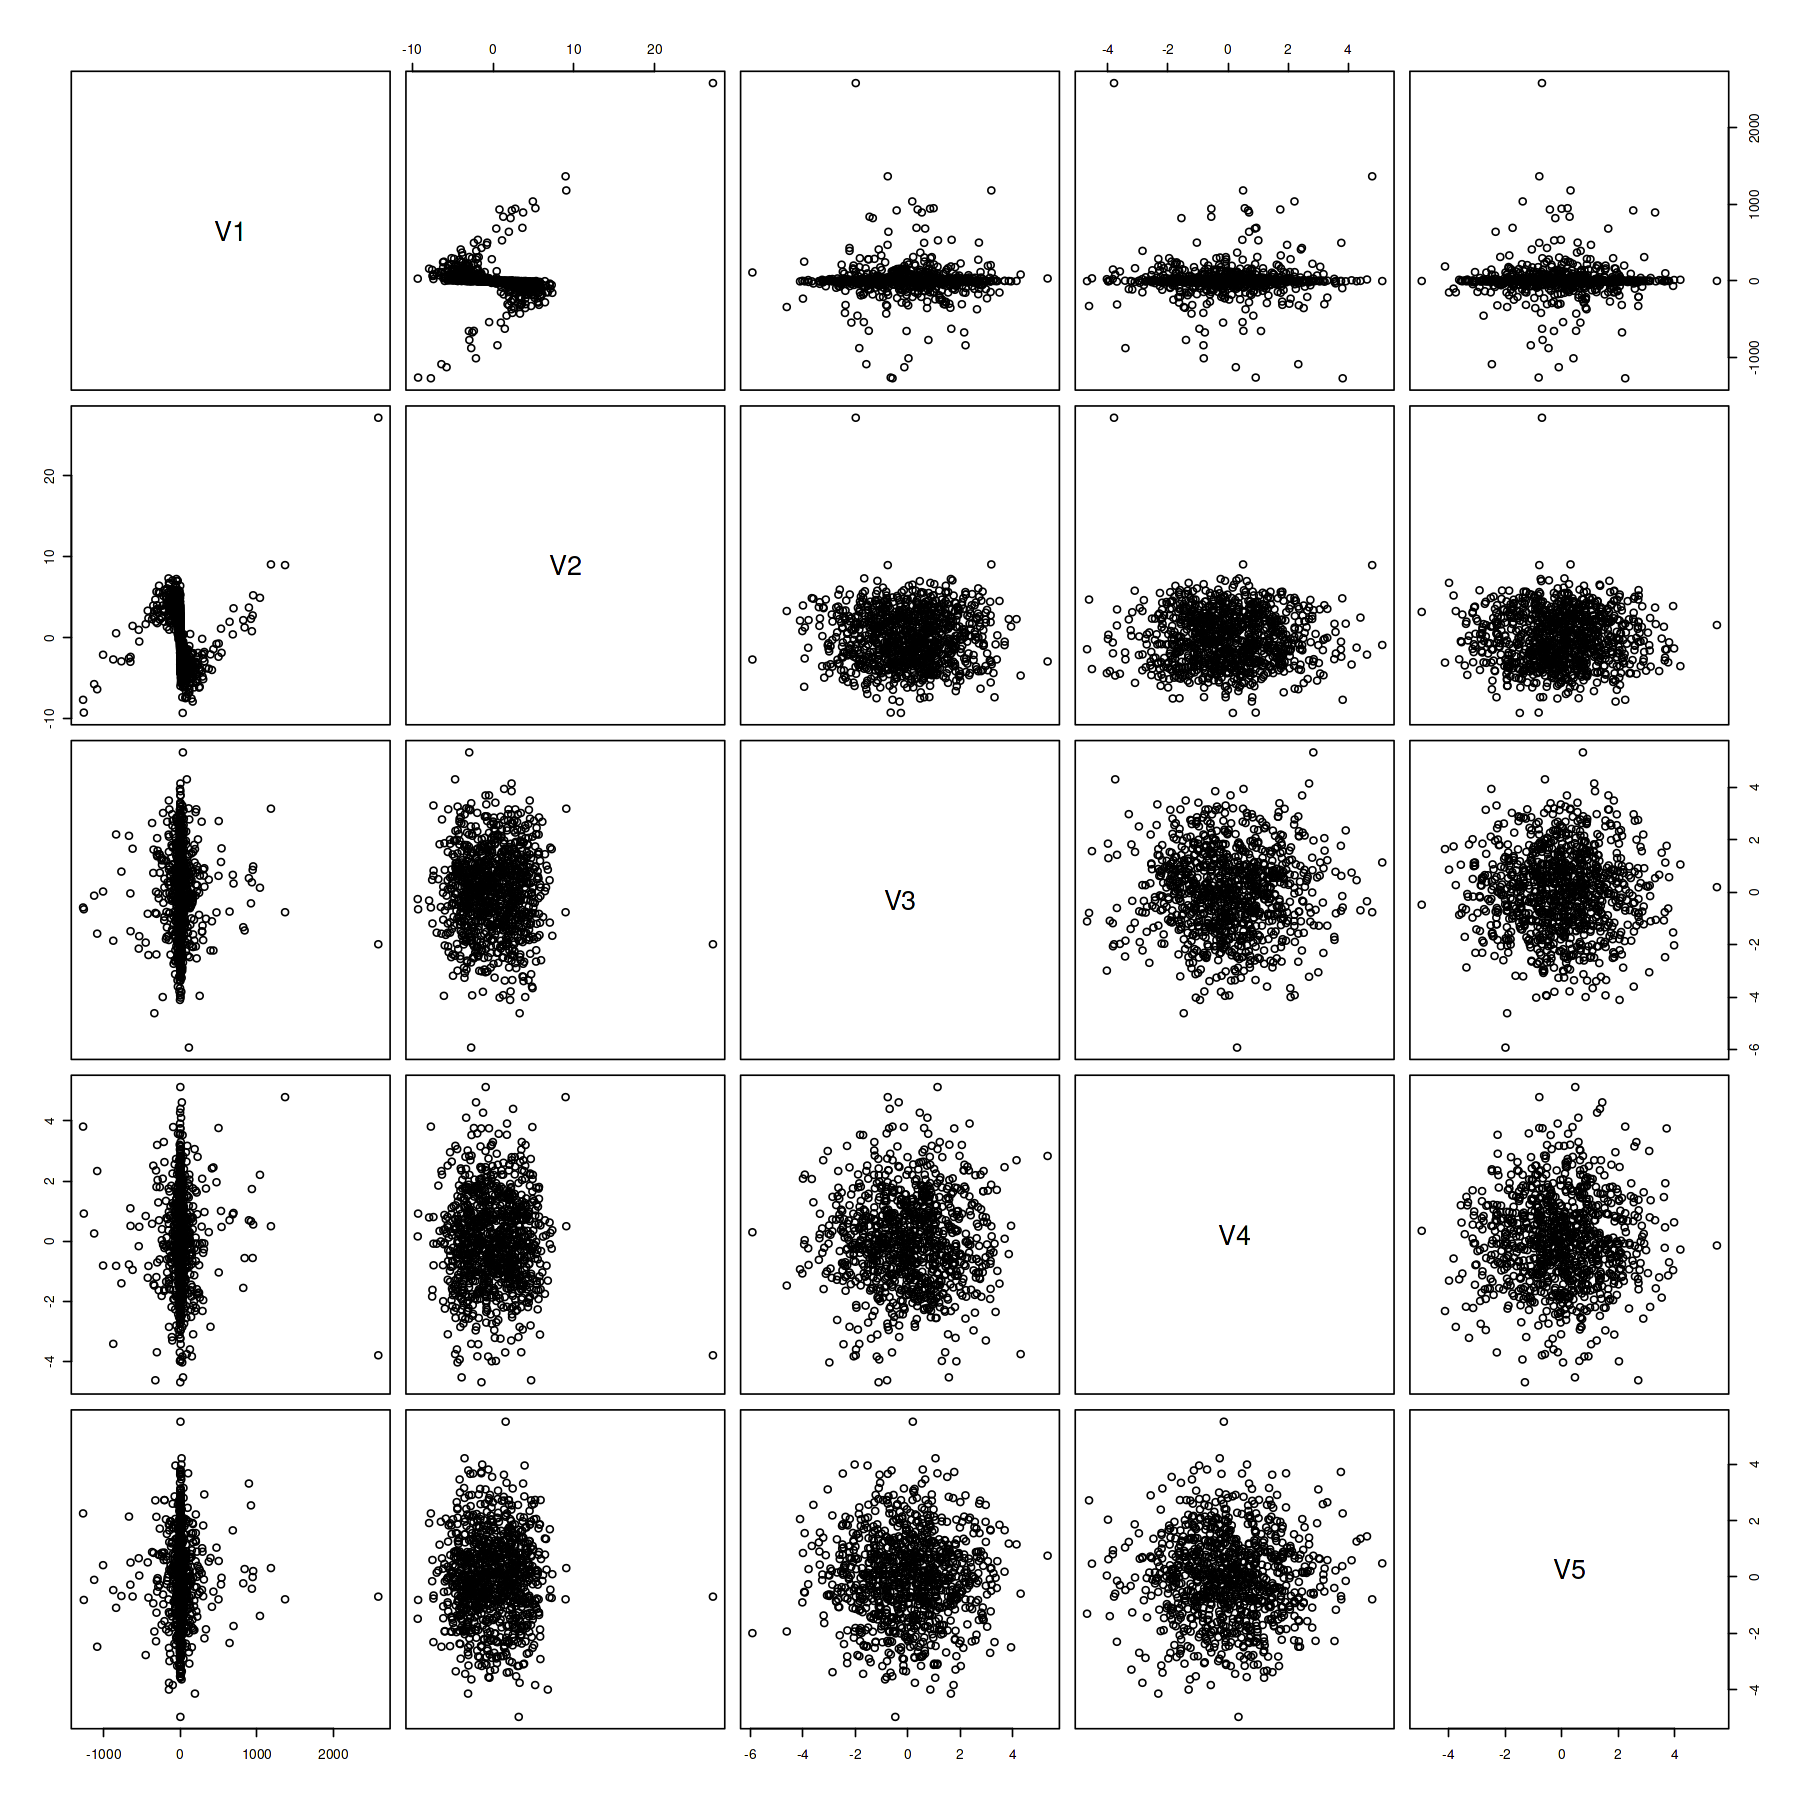

In [24]:
#akurat tutaj mamy dość nieliniowe zależności i wyglądają one dość dziwnie, ale zazwyczaj 
plot(as.data.frame(PCs))

## Regresja i klasyfikacja

### Regresja liniowa

Wracając do nazewnictwa problemów predykcji, niech $Y$ to zmienna decyzyjna, którą chcemy przewidzieć na podstawie predyktorów $X_1, X_2 \dots X_n $.

Podstawową metodą którą powinniście Państwo mieć w statystyce jest **regresja liniowa**, którą akurat stosujemy w przypadku, gdzie $Y$ i i $X_i$ przyjmują wartości ciągłe. Dopasowujemy $\hat{Y}$ do prawdziwych wartości $Y$ na podstawie $X_i$, dobierając wartości współczyniików $w_i$: 

$\large \hat{Y} = (\sum_j w_j X_j) + w_0$



Jeśli mamy $Y$ i tylko jeden $X_1$, to sytuacja znowu jest prosta w interpretacji graficznej - mamy dobry model, jeśli narysujemy wykres punktowy 2D $Y$ oraz $X_1$ i naniesiemy tam $\hat{Y}$. Punkty oryginalnych danych powinny się w miarę pokrywać z modelem (prostą) $\hat{Y}$.

### Klasyfikacja

W naszych danych natomiast $Y$ nie przyjmuje wartości ciągłych. Potrzebna będzie metoda, która przewiduje wartości $0,1$ na podstawie ciągłych $X_i$. Podstawowym podejściem jest wykorzystanie wyników modelu liniowego tak, aby utworzyć klasyfikator (czyli algorytm, który na podstawie ciągłych wartości atrybutów przewidzi dla danej obserwacji klasę decyzyjną $0$ lub $1$).

#### Regresja logistyczna

Najbardziej popularną metodą jest **regresja logistyczna**, która zwraca wartości ciągłe w przedziale $[0,1]$. Jak założymy, że wynik regresji logistycnej to estymowane $p(Y==1 | X_i )$, możemy zrobić klasyfikator, przyjmując jakiś punkt odcięcia:

$$ \large \hat{P}= \frac{e^{w_0 + \sum_j w_j X_j}}{1+ e^{w_0 + \sum_j w_j X_j}} $$

- najpierw obliczamy model liniowy $w_0 + \sum_j w_j X_j$

- potem wkładamy wynik tego do funkcji sigmoidalnej $ \large sigmoid(x)= \frac{exp(x)}{1+exp(x)}$

- w wyniku ostatniego działania, uzyskujemy wartości w przedziale $[0,1]$.

- aby ustalić klasyfikator, przyjmujemy jakiś punkt odcięcia np $0.5$,

- jeżeli dla obserwacji $i$, wynik modelu jest większy to $0.5$, to $\hat{Y}=1$, $0$ inaczej.

**UWAGA:** optymalne dopasowanie współczynników $w_i$  nie jest obliczane jak w regresji liniowej, do tego służą specjalne algorytmy.

**W praktyce:** wywołujemy funkcję w R :)

#### Regresja logistyczna w R

Funkcja `glm` (*general linear model* odpowiednio wywołana) obliczy wszystko, to co trzeba, tylko trzeba wiedzieć, co tam włożyć i co z tego wychodzi.

Spinamy zmienne objaśniające $X_i$ które chcemy użyć oraz zmienną decyzyjną do jednego `data.frame`, i potem wywołujemy `glm` z odpowiednimi argumentami.

In [25]:
#konstruuję zabawkową zmienną decyzyną Y dla przykładu
Y= (X_matrix[,1] + - X_matrix[,2])^(-1) > 0
table(Y)

Y
FALSE  TRUE 
  513   487 

In [26]:
#dla przykładu, zaszumiamy dane

dataSize=length(X_matrix)
dataDim=dim(X_matrix)
Noise<-  rnorm(dataSize,0,4)
dim(Noise)<-dataDim
X_train<- X_matrix + Noise
X_train<- X_train[,1:3]

#### Właściwy kod

In [27]:
logRegData= as.data.frame(cbind(Y, X_train))

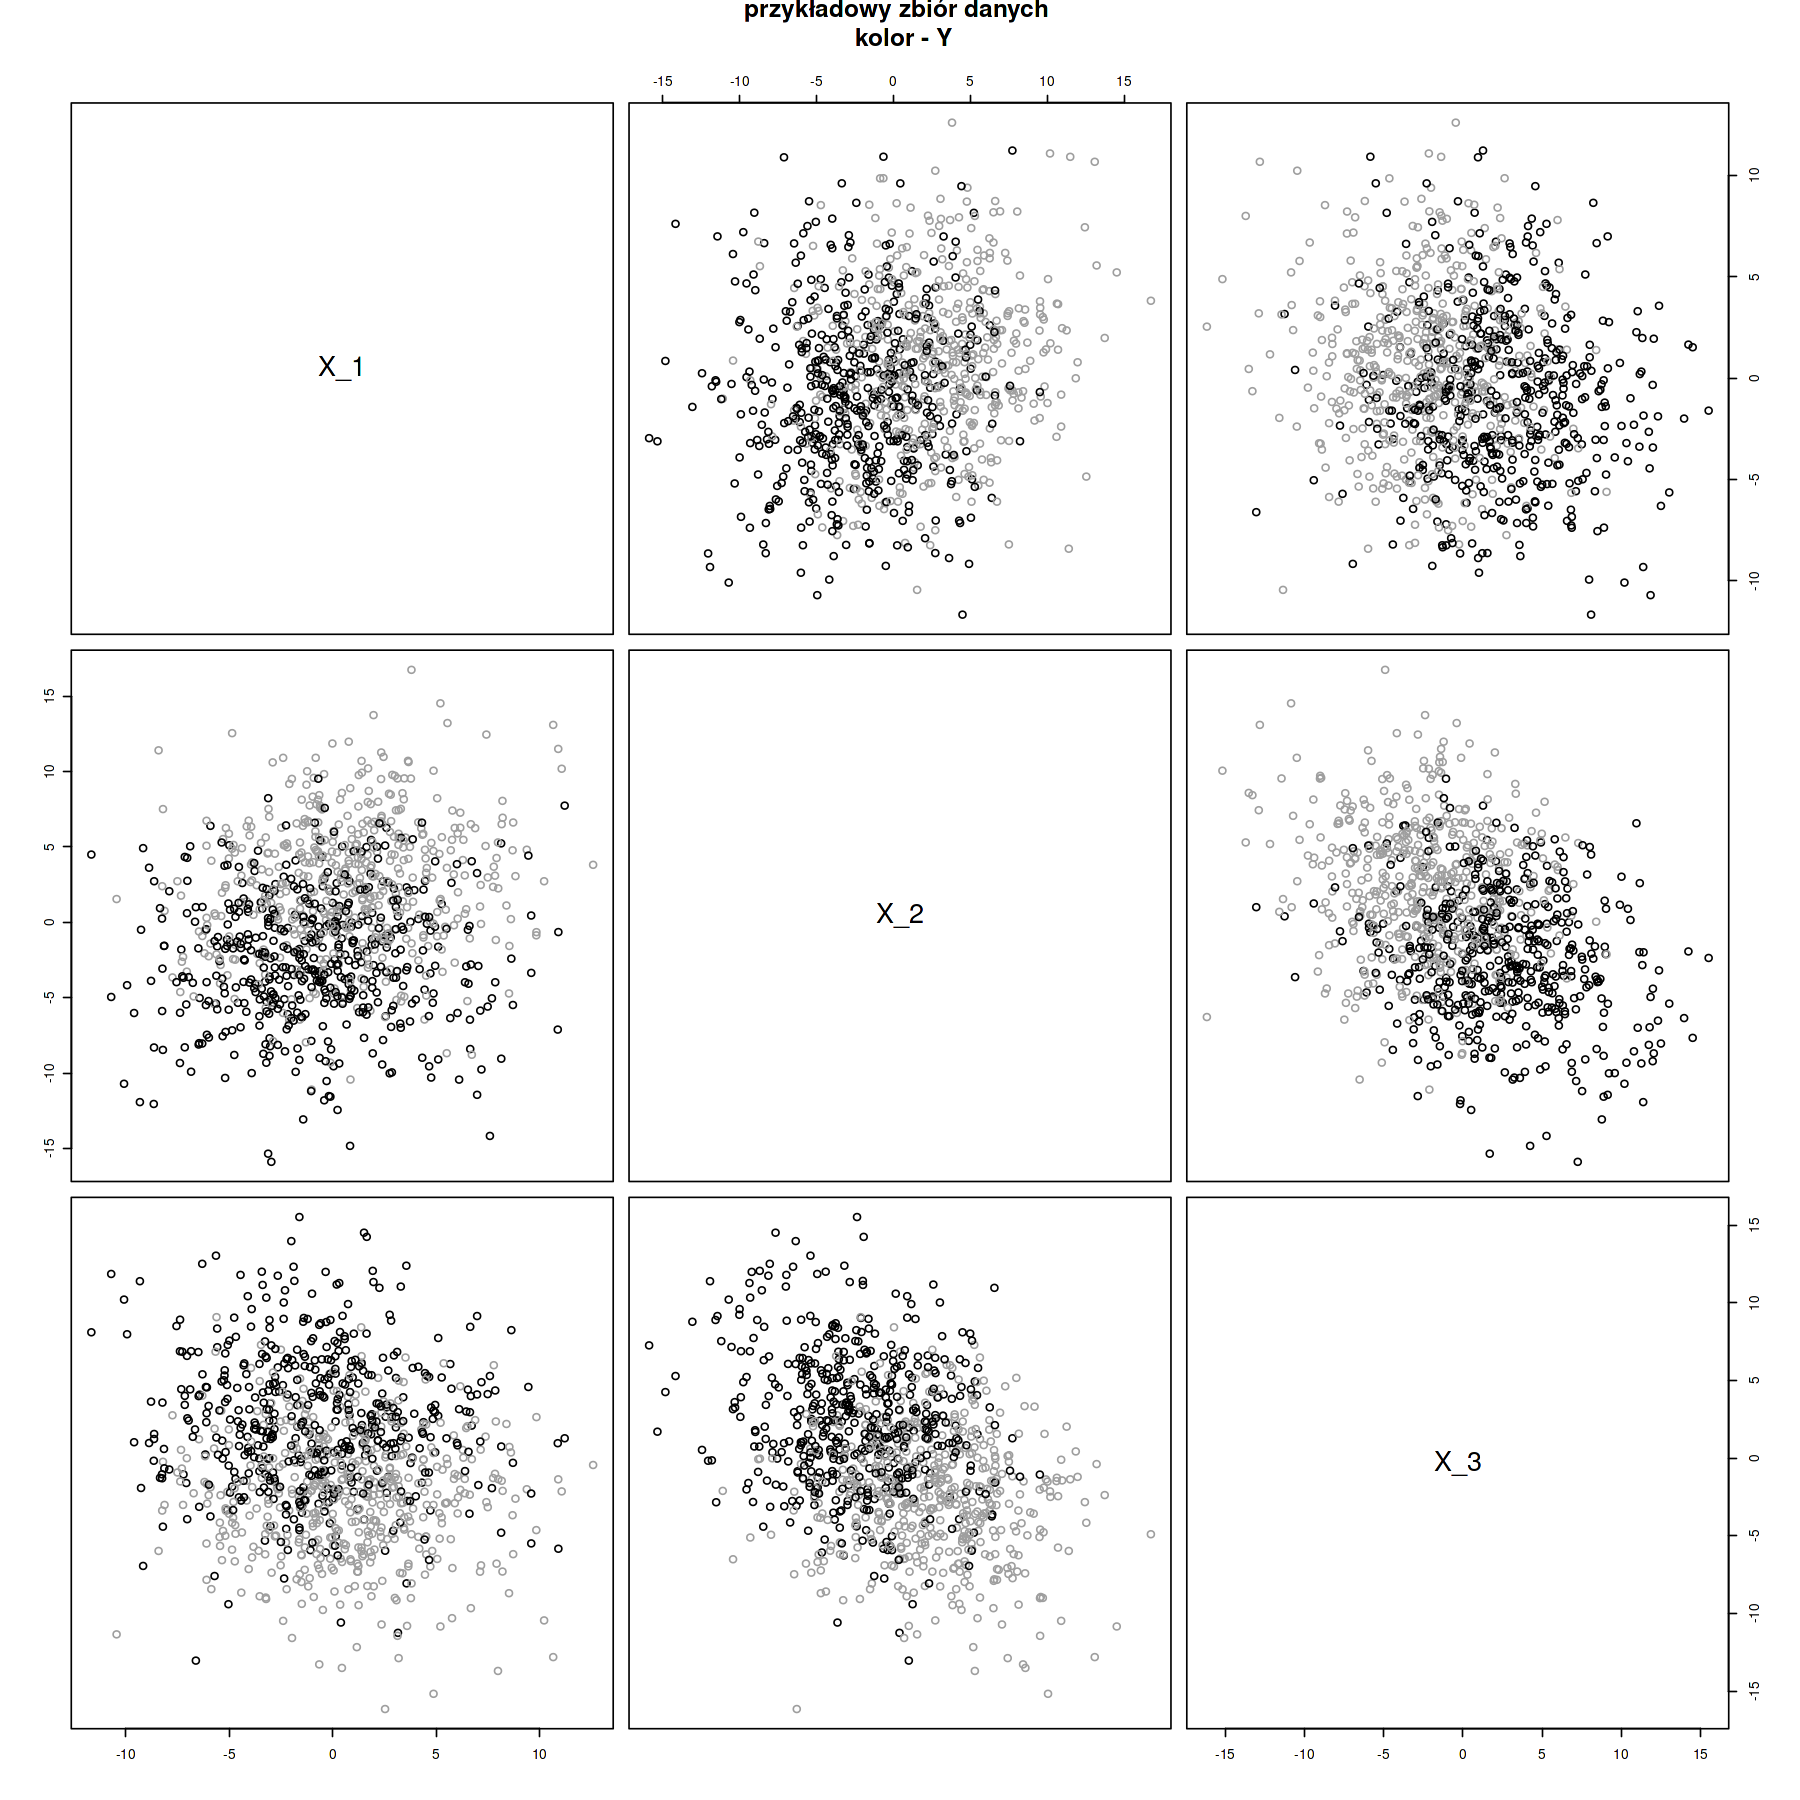

In [28]:
plot(logRegData[,2:ncol(logRegData)],col=Y+16, main= "przykładowy zbiór danych \n kolor - Y")

In [29]:
logreg1 <- glm(Y~., #składnia typowa dla R, formuła opisujaca zależność kolumny Y od reszty
               family=binomial(link='logit'), # żeby była regresja logistyczna
               data=logRegData) # tutaj wkładamy data.frame z danymi

Wyniki działania modelu:

- `Coefficients`: współczynniki $w_i$ wcześniej wspomniane, `Intercept`, współczynnik $w_0$. Interpretacja współczynników pozwala na orzeczenie, które zmienne zwiększają prawdopodobieśtwo $Y=1$ (ich współczynniki są większe niż 0), a które zmniejszają.

- `Estimate`: ich wartość liczbowa

- `Pr(>|z|)`: istoność statystyczna (p-value)

In [30]:
summary(logreg1)


Call:
glm(formula = Y ~ ., family = binomial(link = "logit"), data = logRegData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4898  -0.7504  -0.1534   0.7548   2.5261  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.06288    0.08112  -0.775 0.438245    
X_1         -0.07033    0.02091  -3.363 0.000771 ***
X_2         -0.22769    0.02099 -10.849  < 2e-16 ***
X_3          0.24654    0.02191  11.253  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1385.62  on 999  degrees of freedom
Residual deviance:  926.84  on 996  degrees of freedom
AIC: 934.84

Number of Fisher Scoring iterations: 5


Indeksując obiekt wynikowy jak listę nazwami, dostaniemy się do wielu innych przydatnych informacji.

`fitted.values` - przewidziane prawdopodobieństwa $\hat{P}$. Możemy przyjąć np. punkt odcięcia $0.5$ i dokonać klasyfikacji.

In [31]:
names(logreg1)

[1] "coefficients"      "residuals"         "fitted.values"    
 [4] "effects"           "R"                 "rank"             
 [7] "qr"                "family"            "linear.predictors"
[10] "deviance"          "aic"               "null.deviance"    
[13] "iter"              "weights"           "prior.weights"    
[16] "df.residual"       "df.null"           "y"                
[19] "converged"         "boundary"          "model"            
[22] "call"              "formula"           "terms"            
[25] "data"              "offset"            "control"          
[28] "method"            "contrasts"         "xlevels"

In [32]:
Y_daszek = logreg1$fitted.values > 0.5

Wstępna ocena jakości modelu:

In [33]:
table(Y, Y_daszek) #tzw. confusion matrix

       Y_daszek
Y       FALSE TRUE
  FALSE   404  109
  TRUE    111  376

In [34]:
sum(Y==Y_daszek) # liczba poprawnych klasyfikacji


[1] 780

In [35]:
acc= sum(Y==Y_daszek)/ length(Y) # accuracy, procent poprawnych klasyfikacji
acc

[1] 0.78

## Mierzenie jakości klasyfikatorów

Podstawowe miary:

- dokładność (*accuracy (acc)*) = $ \large \frac{\text{liczba poprawnie zaklasyfikowanych przypadków}}{\text{liczba obserwacji} } $

- czułość (*sensivity* lub *true positive rate (TPR)*) = $ \large \frac{\text{liczba obserwacji, gdzie $Y==1$ oraz $\hat{Y}==1$}}{\text{liczba obserwacji, gdzie $Y==1$ } } $ (dobrze jak duże)

- odsetek przypadków fałszywie pozytywnych (*false positive rate (FPR)*) = $ \large \frac{\text{liczba obserwacji, gdzie $Y==0$ oraz $\hat{Y}==1$}}{\text{liczba obserwacji, gdzie $Y==0$} } $ (obrze jak małe)


**Po co:** sama dokładność może być myląca: rozpatrzmy przykład, gdzie mamy takie $Y$, że jest 10 obserwacji $Y==1$, oraz 90 obserwacji, gdzie $Y==0$, a klasyfikator $\hat{Y}$ zawsze zwraca $0$.

$ acc = \frac{90}{100}=0.9$

$ FPR = \frac{0}{90}=0 $

$ TPR = \frac{0}{10}=0 $

Pod względem np. $TPR$ widać już, że klasyfikator wypada fatalnie. Poza tym, prawdopdobnie jest mało przydatny i nic się nie nauczył (po co mi stosować algorytm uczenia maszynowego który i tak jedyne co zrobi to zwraca zawsze stałą wartość ? :) )

Pomimo, że sam problem jest dość prosty (albo dobrze zgadliśmy, albo nie), w praktyce robi się dość złożone, jak jednoznacznie ocenić, czy klasyfikator dobrze działa:

https://en.wikipedia.org/wiki/Confusion_matrix#Table_of_confusion

### Ustalanie punktu odcięcia

Dużo algorytmów uczenia maszynowego zwraca wartości w przedziale $[0,1]$ i używamy ich do klasyfikacji wybierając punkt odcięcia, jak w poprzednich przykładach z regresji logistycznej. Ogólną dobrość dopasowania klasyfikatora określa krzywa $ROC$, czyli najprościej mówiąc, zależność $TPR, FPR$ od przyjętego punktu odcięcia $t$. 

Na osi $x$ mamy $FPR$, na osi $y$ $TPR$, a dany punkt odpowiada danej wartości $t$ od $0$ do $1$. 

Krzywą rysujemy "od prawej do lewej"- wartość $t=0$ odpowiada punktowi w prawym górnym rogu, im większe $t$ tym punkt jest bardziej na *lewo*.

Im krzywej bliżej do lewego górnego rogu, tym lepiej. Jak krzywa jest prostą- klasyfikator jest słaby, równie dobrze moglibyśmy losować klasę decyzyjną.

Jak krzywa jest przy prawym dolnym rogu - klasyfikator zgaduje "odwrotnie" (czyli uczy się na odwrót- mimo wszystko jest przydatny, musimy tylko odwrócić klasy decyzyjne, które przewiduje)

![foo](https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Roc_curve.svg/1024px-Roc_curve.svg.png)


### AUC

$AUC$ (*Area Under (ROC) Curve*) to pole powierzchni pod krzywą $ROC$. Z dyskusji w poprzednim akapicie wynika, że wyższe $AUC$ odpowiada lepszemu klasyfikatorowi (krzywa $ROC$ jest bliżej lewego, górnego rogu wykresu). Maksymalnie wynosi $1$, minimalnie $0$. Jest to jedna z miar, która dobrze podsumowuje efektywność klasyfikatora zwracającego przewidywane prawdopodobieństwa klasy 1 (bierze pod uwagę każdy punkt odcięcia).   

W praktyce, jeśli dokonamy predykcji za pomocą algorytmu klasyfikującego zwracającego przewidywane prawdopodobieństwa klasy 1 $\hat{p}$, korzystamy z pakietów liczących $AUC$. Policzenie $AUC$ samemu, dysponując wartościami $\hat{p}$ nie jest jednak trudne - dotyczy tego dodatkowe zadanie II.c.

### Poprawne testowanie algorytmów klasyfikacji

W uczeniu maszynowym zależy nam na poprawnej nauce danego algorytmu (czyli u nas - klasyfikatora). Poprawną naukę rozumiemy tutaj jako umiejętność poprawnej klasyfikacji dla danych wcześniej "nie widzialnych" przez dany algorytm.

Dotychczas uczyliśmy i testowaliśmy klasyfikator (jeden rodzaj - oparty o regresję logistyczną) na **jednym i tym samym zbiorze obserwacji**. W związku z tym, ocena jakości klasyfikacji może być sfałszowana:

- być może algorytm nauczył się "na pamięć" zbioru danych i nie potrafi sobie poradzić z poprawną klasyfikacją danych, które nie są identyczne do tych, których nie widział. Mówimy wtedy o **przeuczeniu** (overfitting).

- aby zapobiec **przeuczeniu**, jakość klasyfikacji testujemy **na zbiorze obserwacji, których algorytm "nie widział" podczas dopasowywania swoich parametrów (nauki)**.

W praktyce,  najprostszym rzetelnym sposobem mierzenia jakości klasyfikacji jest: 

1. Dzielenie obserwacji na 2 **rozłączne** zbiory: uczący i testowy, gdzie zazwyczaj zbiór uczący jest większy od zbioru testowego (w liczbie obserwacji).

1. Nauka - dopasowywanie parametrów algorytmu ("*fitowanie*") na zbiorze uczącym.

1. Test - po zakończeniu nauki, mierzymy jakość klasyfikacji **na zbiorze testowym**, wykorzystując np. krzywą $ROC$ (jeżeli algorytm zwraca prawdopodobieństwo klasy 1) i inne miary jakości związane z klasyfikacją binarną.

Bardziej skomplikowane protokoły testowania algorytmów to np. walidacja krzyżowa (patrz ilustracja- schemat walidacji krzyżowej $k$-krotnej), ale nie będziemy z niej korzystać na dzisiejszych zajęciach.


![image](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/K-fold_cross_validation_EN.svg/1920px-K-fold_cross_validation_EN.svg.png)

### Przykładowe narzędzia do konstruowania testu klasyfikacji: podział na zbiór uczący i testowy, liczenie AUC

#### Podział na zbiór uczący i testowy (*train-test split*)

Podział obserwacji na zbiór uczący i testowy, w praktyce polega na:
- przemieszaniu wierszy macierzy zmiennych opisowych $X$ oraz wektora zmiennej decyzyjnej $Y$ **tą samą permutacją**,
- odizolowanie pierwszych `0.7*m` wierszy $X$ oraz elementów $Y$ jako zbioru uczącego, gdzie `m==nrow(X)==length(Y)`,
- pozostałe wiersze `X` i elementy `Y` to zbiór testowy.


In [36]:
#wstępne przygotowanie danych dla przykładu
Y_all= (X_matrix[,1] + - X_matrix[,2])^(-1) > 0
dataSize=length(X_matrix)
dataDim=dim(X_matrix)
Noise<-  rnorm(dataSize,0,4)
dim(Noise)<-dataDim
X_all<- X_matrix + Noise
X_all<- X_all[,1:3]

In [37]:
#właściwy kod:
n_obs<- nrow(X_all)
stopifnot(length(Y_all)==n_obs) # (te wymiary muszą się zgadzać)

#1. losujemy permutację obserwacji

permutationIDX<- sample(1:n_obs, n_obs, replace=FALSE) # z wektora 1:n_obs wylosuj bez zwracania n_obs razy
#permutationIDX to indeksy, którymi można zaindeksować X_all oraz Y_all, aby przemieszać kolejność obserwacji.
X_all<- X_all[permutationIDX,] #po wierszach
Y_all<- Y[permutationIDX] #po elementach

#2. Podział na zbiór uczący i testowy

train_frac=0.70 #załóżmy, że do nauki używamy 70% obserwacji.
n_train<- as.integer(n_obs * train_frac)
trainIDX<- 1:n_train # indeksy zbioru uczącego
#ZBIÓR UCZĄCY:
X_train<- X_all[trainIDX,]
Y_train<- Y_all[trainIDX]
#ZBIÓR TESTOWY:
X_test<- X_all[-trainIDX,]  # x[-IDX] <- x złożony z tych elementów, których indeksy są różne od IDX
Y_test<-Y_all[-trainIDX]

#### Trening (nauka) klasyfikatora na zbiorze uczącym 

Robimy to, co wcześniej, tylko na zbiorze uczącym. Akurat dla regresji logistycznej- wywołujemy `glm` na zbiorze uczącym.



In [38]:
TrainDf= as.data.frame(cbind(Y_train, X_train))

In [39]:
logreg2 <- glm(Y_train~., #składnia typowa dla R, formuła opisujaca zależność kolumny Y od reszty
               family=binomial(link='logit'), # żeby była regresja logistyczna
               data=TrainDf) # tutaj wkładamy data.frame z danymi

#### Test klasyfikatora na zbiorze testowym za pomocą $AUC$

Dokonujemy predykcji w oparciu o zbiór testowy `X_test`. Porównujemy wynik `pred_test` z oczekiwanymi wartościami zmiennej decyzyjnej. Do obliczenia $AUC$ używamy dodatkowej biblioteki.

In [42]:
require(pROC)
pred_prob_test<-predict(logreg2, 
                   newdata = as.data.frame(X_test), #uwaga, X_test!
                   type='response')
roc_test <- roc( Y_test, pred_prob_test)
AUC_test<-auc(roc_test)

Setting levels: control = FALSE, case = TRUE

Setting direction: controls < cases



In [43]:
print(AUC_test)

Area under the curve: 0.8466


## Algorytmy klasyfikacji i ich wykorzystanie

Dodatkowe 2 podstawowe algorytmy klasyfikacji to drzewa decyzyjne oraz las losowy. Las losowy w zasadzie opiera się na inteligentnym wykorzystaniu koncepcji drzewa decyzyjnego. 

Wszystkie z omawianych algorytmów: regresja logistyczna, drzewo decyzyjne oraz las losowy - zwracają jako wynik (dla danej obserwacji) przewidywane prawdopodobieństwo klasy 1, zatem można je testować tak samo, jak regresję logistyczną.

**Ważne:** na ćwiczeniach nie chodzi o to, żeby jakikolwiek z tych algorytmów implementować. Funkcje dostępne są w R i należy z nich odpowiednio skorzystać.

### Drzewo decyzyjne

W dużym skrócie- drzewo działa tak, że bierze jeden obiekt, przepuszcza przez ścieżkę na grafie (drzewie), która jest określona przez węzły grafu.

Początek ścieżki jest w korzeniu drzewa.

Na końcu ścieżki ( na liściach drzewa) znajdziemy orzeczenie, w której klasie obiekt ma się znaleźć.

Podczas podróży przez drzewo, obiekt w danym węźle poddawany jest testowi opartemu na wartości, jakie przyjmują wartości zmiennych opisowych jego opisujące. Wynik testu określa, która gałąź wystająca z węzła będzie stanowić kontynujacę podróży obiektu przez drzewo ( od korzenia do liści).

#### Nauka drzewa (decyzyjnego)

Podczas nauki, dochodzi do ustalenia optymalnych reguł podziału w sensie jakiegoś ustalonego kryterium. Typowo są one oparte o entropię, miarę pochodzącą z teorii informacji. Tak jak dla każdego algorytmu uczenia nadzorowanego, do przeprowadzenia nauki potrzebny jest wektor oczekiwanych wartości zmiennej decyzyjnej.

#### Kod w R

In [51]:
library(tree)
#uwaga, Y_train musi być typu factor:
TrainDf$Y_train<- as.factor(Y_train)
tree_model<- tree(Y_train~.,    
                 split="gini", #kryterium optymalizacji - doboru optymalnych reguł w węzłach, z wykorzystaniem miary Gini Index
                 data=TrainDf) #używamy danych z poprzedniego przykładu
#library(pROC)
pred_prob_test<-predict(tree_model, 
                   newdata = as.data.frame(X_test), #uwaga, X_test!
                   type='vector')
pred_prob_test<- pred_prob_test[,2] #pred_prob_test to macierz 2 kolumnowa
#druga kolumna to prawdopodob. klasy 1, tylko to wybieramy
roc_test <- roc( Y_test, pred_prob_test)
AUC_test<-auc(roc_test)

Setting levels: control = FALSE, case = TRUE

Setting direction: controls < cases



In [53]:
print(AUC_test)

Area under the curve: 0.7237


### Las losowy

W skrócie- kombinacja wielu drzew decyzyjnych. Jako wynik ostateczny używamy zasady głosowania większościowego (każde drzewo w lesie przewiduje jedną z klas 0,1 i wybieramy większość).

Pojedyńcze drzewo w lesie losowym jest przeuczone, ale ich kombinacja już nie.

#### Procedura nauki

1. Początek nauki $i$-tego drzewa.

1. Wylosuj próbę losowania ze zwracaniem $k$ obserwacji (tzw. *bootstrap*).

1. Wylosuj $j$ zmiennych ze zbioru zmiennych opisowych podanych na wejściu. $j$ zmiennych  zostanie użyte do nauki $i$-tego drzewa na próbie bootstrap.

1. Naucz $i$-te drzewo jak normalne drzewo decyzyjne (bez korekty np. polegającej na przycinaniu).

1. Powtórz kroki określoną liczbę $n_t$ razy, tworząc $n_t$ osobnych drzew.

**Uwaga:** Ponieważ nauka $i+1$-tego drzewa nie zależy w żaden sposób od wyniku nauki drzewa $i$-tego, implementacje zazwyczaj opierają się na równoległym uczeniu każdego z drzew, w związku z tym algorytm jest zarówno efektywny jak i szybki. Jest jednym z algorytmów najbardziej odpornych szum losowy. Oznacza to, że w praktyce, mając mało obserwacji, najlepiej zacząć od lasu losowego - można osiągnąć stosunkowo przyzwoity wynik bez nadmiernego obrabiania danych wejściowych.  

#### Kod w R


In [55]:
#install.packages("randomForest")
library(randomForest)
#jak w drzewie, Y_train musi być typu factor, aby randomForest dokonywał klasyfikacji, a nie regresji
TrainDf$Y_train<- as.factor(Y_train)
RF_model<- randomForest(Y_train~.,    
                 data=TrainDf) #używamy danych z poprzedniego przykładu
#wszystkie inne parametry (argumenty funkcji randomForest)...
#... które można podejrzeć w helpie (?randomForest) bądź pisząc formals(randomForest)...
#...można na początek przyjąć domyślne. Wracając do algorytmu powyżej:
#'mtry' odpowiada j
#'sampsize' odpowiada k, jeśli replace=TRUE (domyślnie)
#`ntree` odpowiada n

#library(pROC)
#uwaga, tutaj w 'predict', type musi być równe 'prob'
#pred_prob_test to tutaj macierz 2 kolumnowa (z jedną kolumną na jedną klasę decyzyjną)
#wybieramy kolumnę nr 2 (klasy nr 1) jako prawdopodobieństwa klasy 1
pred_prob_test<-predict(RF_model, 
                   newdata = as.data.frame(X_test), #uwaga, X_test!
                   type='prob')
pred_prob_test<- pred_prob_test[,2]
roc_test <- roc( Y_test, pred_prob_test)
AUC_test<-auc(roc_test)

Setting levels: control = FALSE, case = TRUE

Setting direction: controls < cases



In [56]:
print(AUC_test)

Area under the curve: 0.8257


## Selekcja cech

Podczas poprzednich zajęć, oprócz nauki modelu regresji logistycznej, dokonywaliśmy też selekcji zmiennych (*feature selection*). Model był uczony tylko na pdostawie zmiennych, które zostały uznane za ważne za pomocą testu statystycznego - **T-test-u**. W wariantach `I.a, I.b` dołożyliśmy do tego usuwanie zmiennych skorelowanych, co też jest metodą selekcji zmiennych. 

Wracając do opisu rzetelnego testowania algorytmów klasyfikacji - aby rzetelnie dokonać testu całego protokołu `feature selection + nauka klasyfikatora`, tak naprawdę powinniśmy dokonać selekcji zmiennych **po podziale na zbiór uczący i testowy** i w teście danego alogrytmu na zbiorze testowym używać tylko tych zmiennych, które zostały uznane za ważne na zbiorze uczącym. Coś takiego trzeba zrobić w zadaniu III.c.

Podstawową metodą selekcji cech dla problemu klasyfikacji binarnej może być **T-test**, który już został omówiony na wcześniejszych zajęciach.

### MDFS

Innym, podobnym algorytmem do selekcji cech (też zalicza się do tzw. *filtrów statystycznych*) jest algorytm **MDFS**. Najważniejsze cechy:
- tak samo jak T-test, określa istotność statyczną danej zmiennej i na tej podstawie orzeka, czy jest ona zmienną ważną, ALE
- oparty jest o inny test statystyczny- bazujący na teorii informacji i pojęciu entropii zmiennej losowej dyskretnej,
- w skrócie: **dana zmienna opisowa $x_i$ jest uznana za ważną**, gdy wiedza o jej wartościach pomaga odgadnąć wartości zmiennej decyzyjnej $Y$, 
- dokładniej, jeżeli **entropia zmiennej $Y$ warunkiem $x_i$ jest mniejsza, niż entropia entropia zmiennej $Y$ analizowanej samodzielnie**, to $x_i$ jest zmienną ważną;
- tak się składa, że algorytm MDFS został stworzony w i jest rozwijany przez Zakład Bioinformatyki UwB C:

#### Entropia

**Entropia** mierzy "stopień losowości" danej zmiennej losowej. Przykładowo: załóżmy, że rzucam niewyważoną monetą, dla której:
- $P(orzeł)=0.7 > P(reszka)=0.3$ 
- i zmienna losowa $Z$ modeluje tą sytuację. 

Jak będę za każdym będę stawiał na to, że wypadnie orzeł, będę miał rację około 70 razy na 100 prób. 

Jeśli $W$ to zmienna losowa opisująca rzut monetą symetryczną, tzn. $P(orzeł)=P(reszka)=0.5$, to jeśli znowu - zawsze będę zakładał, że wypadnie orzeł, będę miał rację tylko ok. 50 razy na 100 prób. 

Tak samo też będzie, gdy dla $W$ zawsze będę zakładał, że wypadnie reszka. Stąd entropia ("losowość") zmiennej $W$ jest *większa* niż entropia zmiennej $Z$.

#### Korzystanie z MDFS 1D w R




In [67]:
#dokładamy 20 zmiennych nieistotnych dla przykładu
X_all<- cbind(X_all, matrix(rnorm(20*1000), ncol=20))
dim(X_all)

[1] 1000   23

In [68]:
#właściwy kod

#install.packages("MDFS")
library(MDFS)
mdfs_on_X<-MDFS(data=X_all,
decision=Y_all,
n.contrast = ncol(X_all), #sugerowana wartość
dimensions = 1,  # tutaj nie zwiększamy, chyba że liczymy na GPU (na labach nie policzymy :) )
divisions = 1,   # zazwyczaj mniejsze wartości działają lepiej
discretizations = 30, # tyle prawdopodobnie starczy
range = 0.3,    #zazwyczaj wyniki są lepsze, jeśli > 0
p.adjust.method = "bonferroni",  #w praktyce zazwyczaj inna metoda, ale na labach zrobimy tak jak z T.testem
level = 0.05                     #poziom statystycznej istoności. trzymamy się 0.05, jak przy T-teście
)


In [69]:
pvals<-mdfs_on_X$p.value           #p-wartości po jeden dla każdej ze zmiennych w X_all
adj.pvals<-mdfs_on_X$adjusted.p.value  #p-wartości po korekcie (po p.adjust, tak jak robilismy z T-test)
importantIDX<-mdfs_on_X$relevant.variables #indeksy zmiennych ważnych w X_all, 
#tj. relevant.variables == which(adjusted.p.value < level)

In [71]:
importantIDX #jak oczekujemy, wykryliśmy pierwsze 3 zmienne 
# żadna z dodatkowych 20 zmiennych nie została wykryta.

[1] 1 2 3

In [74]:
#widać to też po p-wartościach:
cbind(variable_IDX=1:10, 
      p.value=pvals[1:10],
      adj.p.value=adj.pvals[1:10]
      )

variable_IDX,p.value,adj.p.value
1,8.298715e-11,1.908704e-09
2,1.544193e-43,3.551645e-42
3,2.322893e-44,5.342653e-43
4,5.245138e-02,1.000000e+00
5,7.601744e-01,1.000000e+00
6,7.979177e-01,1.000000e+00
7,2.175253e-01,1.000000e+00
8,9.065928e-01,1.000000e+00
9,7.541296e-01,1.000000e+00
10,9.065928e-01,1.000000e+00


In [70]:
X_important<- X_all[,importantIDX] # zbiór X_all ograniczony do zmiennych ważnych

### *MDFS 2D (dodatkowo, wiedza niepotrzebna do rozwiąznia ćwiczeń)*

Innym aspektem MDFS, który wyróżnia go na tle podstawowych metod selekcji jest możliwość wykrycia interakcji między zmiennymi opisowymi. Jeśli zmienna decyzyjna $Y$ przyjmuje wartość $1$ tylko dla ściśle określonej kombinacji wartości np. pary zmiennych opisowych, jednowymiarowy test (jak np. T-test) może okazać się niewystarczający. Sytuację ilustruje rysunek poniżej, osie OX i OY to dwie zmienne opisowe, kolorem oznaczona jest zmienna decyzyjna, posczególnym punktem jest dana obserwacja. jeśli $Y$ jest zdefiniowane np. jako $XOR(x_1,x_2)$ (np. przyjmuje warości równe 1 tylko gdy jedna zmienna naraz z $x_1,x_2$ jest duża), T-test  zmiennych $x_1, x_2$ nigdy wykryje - z dokładnością do statystycznej losowości). Ilustruje to pomocniczy rysunek po lewej stronie OY i poniżej OX.

![img](https://i.ibb.co/17XJwXk/xor-xir.jpg)

MDFS-2D wykrywa interakcje badając entropię $Y$ warunkiem pary $x_1,x_2$ oraz np. warunkiem samego $x_1$. Jeśli entropia warunkowa dla pary jest mniejsza, niż dla samego $x_1$, to metoda jednowymiarowa będzie mniej efektywna w wykrywaniu $x_1$ oraz $x_2$.